# HW10, DATSCI W261

Team: Kuan Lin, Alejandro J. Rojas, Ricardo Barrera<br/>
Emails: kuanlin@ischool.berkeley.edu, ale@ischool.berkeley.edu, ricardofrank@ischool.berkeley.edu<br/>
Time of Initial Submission: 8:00 AM PST, Tuesday, March 29, 2016<br/>
W261-1, Spring 2016 Week 10 Homework

In [1]:
import os
import sys
#spark_home = os.environ['SPARK_HOME'] = '/Users/liang/Downloads/spark-1.4.1-bin-hadoop2.6/'
spark_home = os.environ['SPARK_HOME'] = 'C:\\spark-1.6.1-bin-hadoop2.6'

if not spark_home:
    raise ValueError('SPARK_HOME enviroment variable is not set')
sys.path.insert(0,os.path.join(spark_home,'python'))
sys.path.insert(0,os.path.join(spark_home,'python', 'lib', 'py4j-0.9-src.zip'))
execfile(os.path.join(spark_home,'python', 'pyspark', 'shell.py'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 1.6.1
      /_/

Using Python version 2.7.11 (default, Jan 29 2016 14:26:21)
SparkContext available as sc, HiveContext available as sqlContext.


# HW 10.0: Short answer questions

What is Apache Spark and how is it different to Apache Hadoop? 

Fill in the blanks:
Spark API consists of interfaces to develop applications based on it in Java, ...... 
languages (list languages). 

Using Spark, resource management can be done either in a single server instance or using a 
framework such as Mesos or ????? in a distributed manner.

What is an RDD and show a fun example of creating one and bringing the first element back to 
the driver program.

What is lazy evaluation and give an intuitoive example of lazy evaluation and comment on the 
massive computational savings to be had from lazy evaluation.

Apache Spark is a open-source cluster computing framework.  Due to its use of optimized DAG and in-memory computing, Spark can in general outperforms Hadoop, which requires disc-write for each map-reduce step.  The Spark data abstraction (RDD) also exposes more API than just map-reduce, which is the primary programming paradign for Hadoop.

Java, Scala, Python

YARN, or Spark's stand-alone cluster manager

RDD stands for resilient distributed dataset and is Spark's immutable abstraction for iterable data.  The iteratable data can also be in the form of key-value pairs which enables parallel key-value operations.  RDD is lazily evaluated and fault-tolerant through keeping records of data lineage.  Here is an example:<br/>
<pre>
  sample_rdd = sc.parallelize([1,2,3,4,5])  # create an rdd using parallelize
  sample_rdd.take(1).collect()  # take(1) will retrieve one element when evaluated.  Collect forces evaluation and brings data to the driver program
</pre>

Lazy evaluation means the expression is not executed/evaluated when it is first defined, but is only executed/evaluated when the result of the expression is called.  One example of how lazy evaluation can provide computational saving is to see how Spark process large files when using sc.textFile method.  When sc.textFile is first called, instead of actually reading the file, Spark is only keeping a data abstraction.  If the driver program actually needs to read the entire file, it will block the execution of the entire program, and the reading of the entire file may not even be needed.  Instead, the file is only read line by line when each iteration of rdd operation is called.

# HW 10.1:

In Spark write the code to count how often each word appears in a text document (or set of documents). 
Please use this homework document as a the example document to run an experiment.  
Report the following: provide a sorted list of tokens in decreasing order of frequency of occurence.

In [4]:
logFileNAME = 'MIDS-MLS-HW-10.txt'
text_file = sc.textFile(logFileNAME)
counts = text_file.flatMap(lambda line: line.split(" ")).filter(lambda token: token.strip() != '') \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b)
for v in sorted(counts.collect(), key=lambda x: x[1], reverse=True):
    print v

(u'the', 46)
(u'and', 23)
(u'in', 18)
(u'of', 17)
(u'a', 12)
(u'for', 11)
(u'code', 9)
(u'to', 9)
(u'is', 8)
(u'=', 8)
(u'data', 8)
(u'#', 7)
(u'with', 7)
(u'this', 7)
(u'Using', 7)
(u'your', 7)
(u'on', 7)
(u'===', 6)
(u'HW', 6)
(u'KMeans', 6)
(u'from', 5)
(u'as', 5)
(u'What', 4)
(u'Sum', 4)
(u'Comment', 4)
(u'Squared', 4)
(u'==HW', 4)
(u'each', 4)
(u'linear', 4)
(u'example', 4)
(u'clusters', 4)
(u'Set', 4)
(u'words', 3)
(u'Spark', 3)
(u'+', 3)
(u'available', 3)
(u'lazy', 3)
(u'100', 3)
(u'training', 3)
(u'count', 3)
(u'Please', 3)
(u'following', 3)
(u'report', 3)
(u'model', 3)
(u'Errors', 3)
(u'results', 3)
(u'using', 3)
(u'Within', 3)
(u'===HW', 3)
(u'it', 3)
(u'import', 3)
(u'after', 3)
(u'plot', 3)
(u'an', 3)
(u'regression', 3)
(u'document', 3)
(u'provided', 3)
(u'x', 3)
(u'-----------------------', 2)
(u'homework', 2)
(u'notebook:', 2)
(u'(one', 2)
(u'evaluation', 2)
(u'--', 2)
(u'iterations', 2)
(u'list', 2)
(u'run', 2)
(u'plots.', 2)
(u'per', 2)
(u'Report', 2)
(u'https://www.dro

# HW 10.1.1

Modify the above word count code to count words that begin with lower case letters (a-z) and 
report your findings. Again sort the output words in decreasing order of frequency.

In [5]:
logFileNAME = 'MIDS-MLS-HW-10.txt'
text_file = sc.textFile(logFileNAME)
counts = text_file.flatMap(lambda line: line.split(" ")).filter(lambda token: token.strip() != '' and token[0].islower()) \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b)
for v in sorted(counts.collect(), key=lambda x: x[1], reverse=True):
    print v

(u'the', 46)
(u'and', 23)
(u'in', 18)
(u'of', 17)
(u'a', 12)
(u'for', 11)
(u'code', 9)
(u'to', 9)
(u'is', 8)
(u'data', 8)
(u'with', 7)
(u'this', 7)
(u'on', 7)
(u'your', 7)
(u'from', 5)
(u'as', 5)
(u'clusters', 4)
(u'each', 4)
(u'linear', 4)
(u'example', 4)
(u'count', 3)
(u'words', 3)
(u'report', 3)
(u'available', 3)
(u'lazy', 3)
(u'following', 3)
(u'training', 3)
(u'model', 3)
(u'results', 3)
(u'using', 3)
(u'x', 3)
(u'import', 3)
(u'plot', 3)
(u'it', 3)
(u'an', 3)
(u'regression', 3)
(u'document', 3)
(u'provided', 3)
(u'after', 3)
(u'homework', 2)
(u'notebook:', 2)
(u'evaluation', 2)
(u'list', 2)
(u'run', 2)
(u'regression.', 2)
(u'per', 2)
(u'https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0', 2)
(u'here', 2)
(u'iterations', 2)
(u'word', 2)
(u'set.', 2)
(u'clusters.', 2)
(u'plots.', 2)
(u'findings.', 2)
(u'set', 2)
(u'testing', 2)
(u'iterations,', 2)
(u'between', 2)
(u'be', 2)
(u'found', 2)
(u'how', 2)
(u'via', 2)
(u'or', 2)
(u'one', 2)
(u'that', 2)
(u'differences', 2)
(u'

# HW 10.2: KMeans a la MLLib

Using the following  MLlib-centric KMeans code snippet: 

from pyspark.mllib.clustering import KMeans, KMeansModel<br/>
from numpy import array<br/>
from math import sqrt

#### Load and parse the data
NOTE  kmeans_data.txt is available here<br/>
https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0

data = sc.textFile("kmeans_data.txt")<br/>
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

#### Build the model (cluster the data)

clusters = KMeans.train(parsedData, 2, maxIterations=10, runs=10, initializationMode="random")

#### Evaluate clustering by computing Within Set Sum of Squared Errors
<pre>
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))
</pre>

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)<br/>
print("Within Set Sum of Squared Error = " + str(WSSSE))

#### Save and load model

clusters.save(sc, "myModelPath")<br/>
sameModel = KMeansModel.load(sc, "myModelPath")


#### NOTE  kmeans_data.txt is available here
https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 

Run this code snippet and list the clusters that your find and compute the <br/>
Within Set Sum of Squared Errors for the found clusters. Comment on your findings.

In [4]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# sum of square error
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

# load the data
data = sc.textFile("kmeans_data.txt")
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# train K-mean model
clusters = KMeans.train(parsedData, 2, maxIterations=10, runs=10, initializationMode="random")
# print cluster centers
print("Fitted Cluster Centers: %s"%str(clusters.clusterCenters))

# calculate total sum of squre errors
WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

#clusters.save(sc, "myModelPath")
#sameModel = KMeansModel.load(sc, "myModelPath")

Fitted Cluster Centers: [array([ 0.1,  0.1,  0.1]), array([ 9.1,  9.1,  9.1])]
Within Set Sum of Squared Error = 0.692820323028


Since two of the data points are the exact average of the two clusters, the model fit to those two points.

# HW 10.3:

Download the following KMeans notebook:

https://www.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb?dl=0

Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided). Plot the data.
Then run MLlib's Kmean implementation on this data  and report your results as follows:

- plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations.
- in each plot please report the Within Set Sum of Squared Errors for the found clusters. Comment on the progress of this measure as the KMEans algorithms runs for more iterations

#### Generate data

In [2]:
import numpy as np

size1 = size2 = size3 = 100
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1) # cluster center at (4, 0)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2) # cluster center at (6, 6)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3) # cluster center at (0, 4)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('data.csv',data,delimiter = ',')

#### Data Visualization

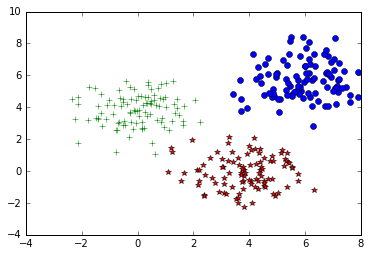

In [4]:
 %matplotlib inline
import pylab
pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()

#### Run MLlib's KMean

-----Iteration: 1-----


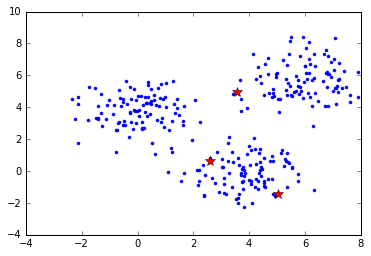

Fitted Cluster Centers: [array([ 2.59559876,  0.6131352 ]), array([ 5.02138427, -1.43402837]), array([ 3.56775908,  4.95713446])]
Within Set Sum of Squared Error = 770.503233831

-----Iteration: 10-----


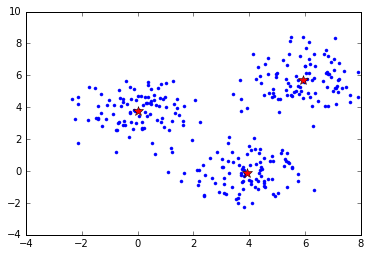

Fitted Cluster Centers: [array([ 5.9171945 ,  5.72228003]), array([ 3.91113599, -0.12315918]), array([ 0.019176  ,  3.77865588])]
Within Set Sum of Squared Error = 397.07309166

-----Iteration: 20-----


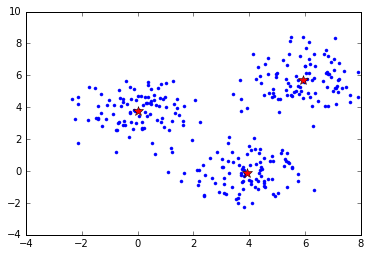

Fitted Cluster Centers: [array([ 5.9171945 ,  5.72228003]), array([ 3.91113599, -0.12315918]), array([ 0.019176  ,  3.77865588])]
Within Set Sum of Squared Error = 397.07309166

-----Iteration: 100-----


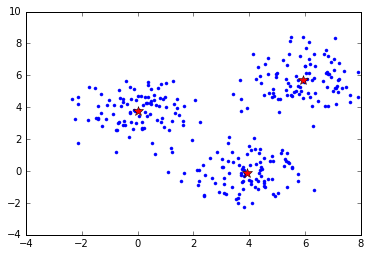

Fitted Cluster Centers: [array([ 3.91113599, -0.12315918]), array([ 0.019176  ,  3.77865588]), array([ 5.9171945 ,  5.72228003])]
Within Set Sum of Squared Error = 397.07309166



In [8]:
from pyspark.mllib.clustering import KMeans
from numpy import array
from math import sqrt

def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()

# Load and parse the data
data = sc.textFile("data.csv")
parsedData = data.map(lambda line: array([float(x) for x in line.split(',')]))

# Build the model (cluster the data)
for iternum in (1, 10, 20, 100):
    clusters = KMeans.train(parsedData, 3, maxIterations=iternum, initializationMode="random")
    WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print "-----Iteration: %s-----"%iternum
    plot_iteration(clusters.clusterCenters)
    print("Fitted Cluster Centers: %s"%str(clusters.clusterCenters))
    print("Within Set Sum of Squared Error = " + str(WSSSE))
    print ""

In general, more iterations should allow sum of square errors to decrease as the model increases its fit to data.  In this particular case the model found the optimal centroid after 10-iteration and the sum of square errors cease to decrease further.

# HW 10.4:

Using the KMeans code (homegrown code) provided repeat the experiments in HW10.3. Comment on any differences between the results in HW10.3 and HW10.4. Explain.

-----Iteration: 1-----
Newly fitted centroids:
[[ 1.39297111 -0.02273506]
 [ 4.0824017   2.655742  ]
 [ 2.31869723  5.83354346]]
Within set sum of squared error: 2810.3752


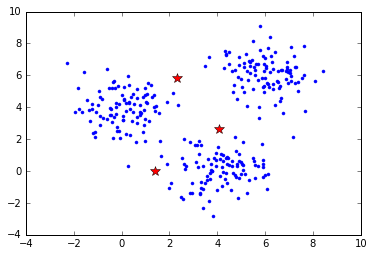


-----Iteration: 10-----
Newly fitted centroids:
[[ 2.17891199  0.37030474]
 [ 5.41811984  2.46090599]
 [ 2.49796495  5.39887248]]
Within set sum of squared error: 2470.8899


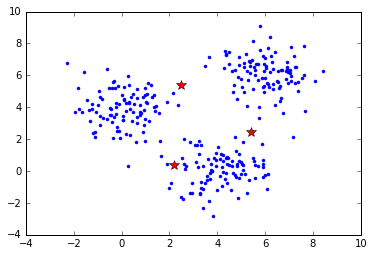


-----Iteration: 20-----
Newly fitted centroids:
[[ 2.79917986  0.33327229]
 [ 5.99971331  3.32665249]
 [ 2.13357573  5.25700161]]
Within set sum of squared error: 2019.7678


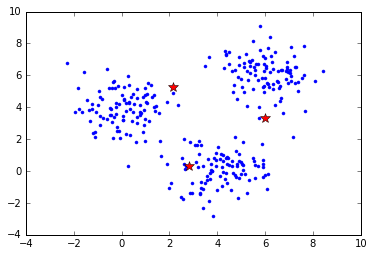


-----Iteration: 100-----
Newly fitted centroids:
[[ 3.63238912  0.18003169]
 [ 6.23417677  5.46921703]
 [ 0.81260516  4.65963437]]
Within set sum of squared error: 814.4980


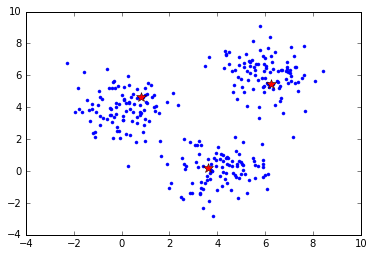

In [5]:
%matplotlib inline
import numpy as np
from numpy import array
from math import sqrt
import pylab

# generate data
size1 = size2 = size3 = 100
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1) # cluster center at (4, 0)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2) # cluster center at (6, 6)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3) # cluster center at (0, 4)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('data.csv',data,delimiter = ',')

#Calculate which class each data point belongs to
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()
    
K = 3
# Initialization: initialization of parameter is fixed to show an example
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])

D = sc.textFile("data.csv").cache()
for i in (1, 10, 20, 100):  
    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
    centroids = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
    # calculate new error
    WSSSE = D.map(nearest_centroid).map(lambda data: sum(x**2 for x in (data[1][0]-centroids[data[0]]))).reduce(lambda x1,x2: x1+x2)
    print "-----Iteration: %s-----"%i
    print "Newly fitted centroids:"
    print str(centroids)
    print "Within set sum of squared error: %.4f"%WSSSE
    plot_iteration(centroids)
    print ""

The homegrown Kmean implementation converges slower (and therefore have higher WSSSE) than the MLlib implementation.  The MLlib implementation has several enhancements which may explain the difference:

- The MLlib implementation uses smarter initialization strategy (KMeanII, a variance of KMean++).
- For each iteration, the MLlib repeats multiple times and select the best result, which will help convergence.